# PRÀCTICA 2 - CLASSIFICACIÓ

1597487 | Manuel Arnau Fernández

1600123 | Alba Fernández Coronado

1605547 | Marina Palomar González

In [1]:
# Carregant les llibreries necessàries
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections as col
import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats
import random as rand
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder, StandardScaler, scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
import time
from yellowbrick.target import FeatureCorrelation

warnings.filterwarnings("ignore")


In [2]:
# Obrint el dataset
dataset = pd.read_csv('./weatherAUS.csv')
print(f'Mida de les dades: {dataset.shape}')
dataset.info()
dataset.head()

Mida de les dades: (145460, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#S'agafen tots els atributs que no siguin object
NoObj_data = dataset[dataset.select_dtypes(exclude=['object']).columns]
NoObj_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


No     75.839406
Yes    21.914616
Name: RainTomorrow, dtype: float64
Número NaNs:  3267


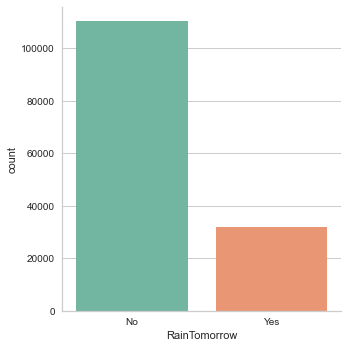

In [4]:
#Target: variable objectiu
Y = dataset['RainTomorrow']

Y.nunique() #quants tipus de valors hi ha: 2
Y.unique() #quins són els valors únics: 0, 1
print(Y.value_counts()/len(Y)*100) #percentatge de cada resposta
print("Número NaNs: ",Y.isnull().sum()) #Numero NaNs
sns.catplot(x = 'RainTomorrow', data = dataset, kind = "count", palette='Set2')


No     75.841468
Yes    21.916678
Name: RainToday, dtype: float64
Número NaNs:  3261


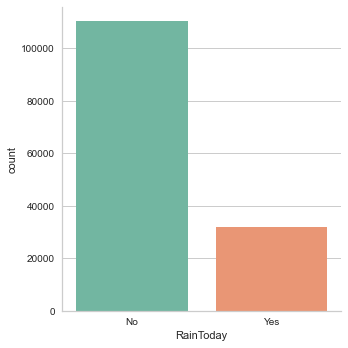

In [5]:
#Variable RainToday
T = dataset['RainToday']

T.nunique() #quants tipus de valors hi ha: 2
T.unique() #quins són els valors únics: 0, 1
print(T.value_counts()/len(Y)*100) #percentatge de cada resposta
print("Número NaNs: ",T.isnull().sum()) #Numero NaNs
sns.catplot(x = 'RainToday', data = dataset, kind = "count", palette='Set2')

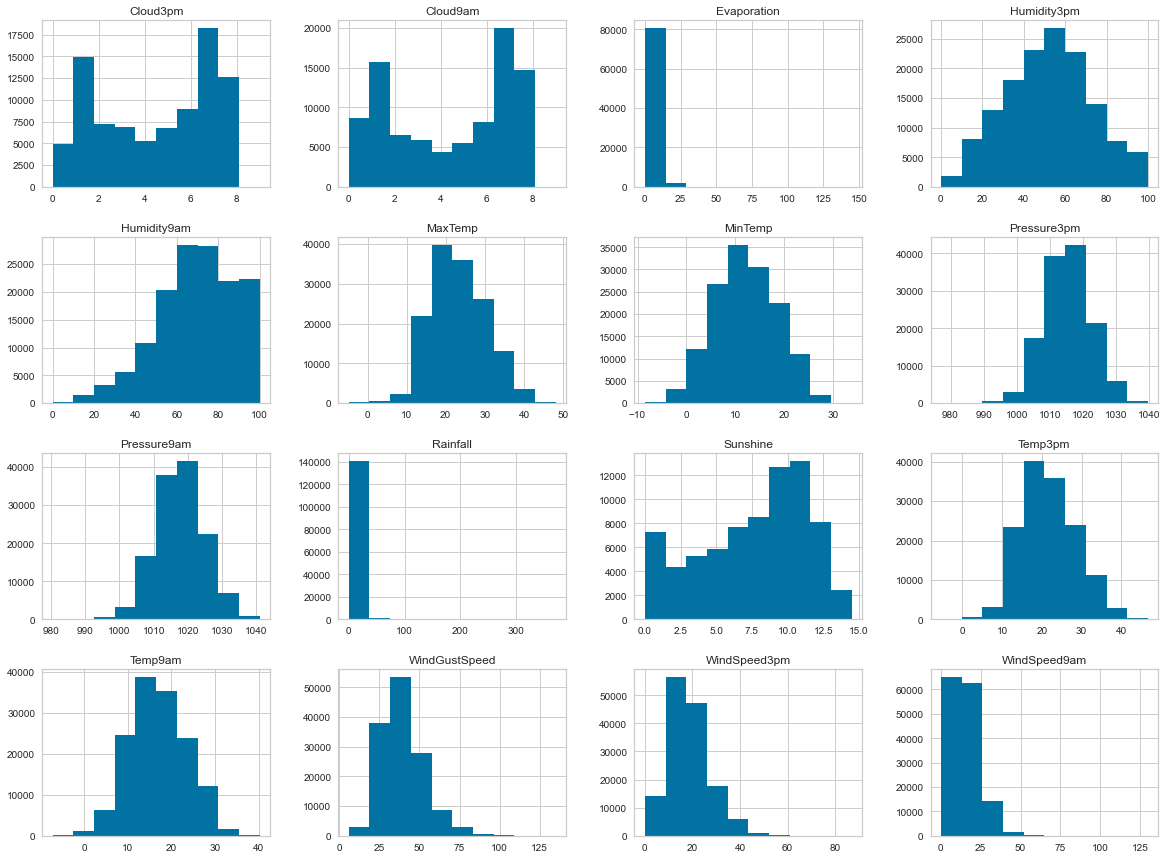

In [6]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

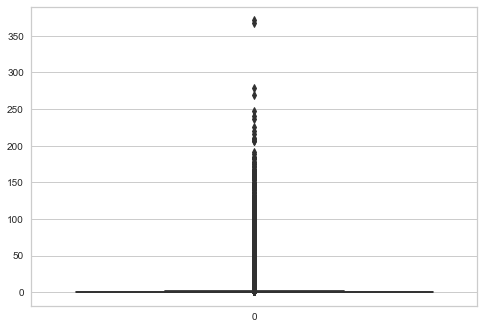

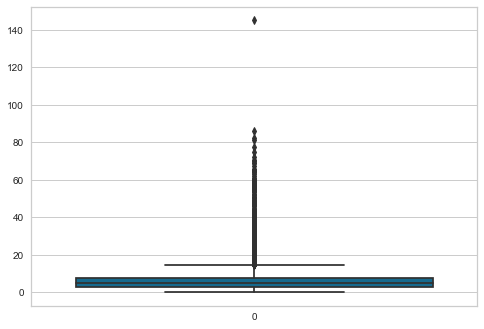

In [7]:
#Variable Rainfall
sns.boxplot(dataset['Rainfall'])
plt.show()

#Variable Evaporation
sns.boxplot(dataset['Evaporation'])
plt.show()

#Hi ha NaNs que s'hauran de tractar

In [8]:
#sns.pairplot(dataset[dataset.select_dtypes(exclude=['object']).columns], hue = 'RainTomorrow')

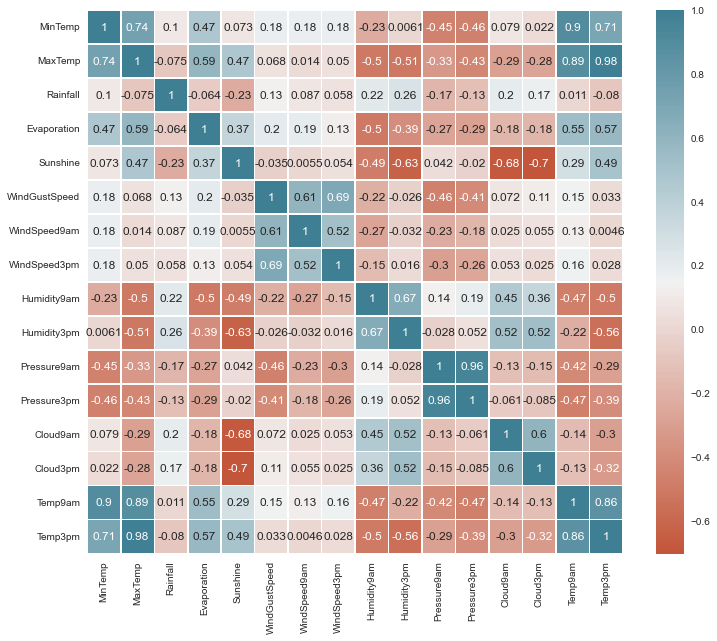

In [9]:
# Estudi de la correlació entre els atributs
correlacio = dataset.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5, cmap = sns.diverging_palette(20, 220, n=200))

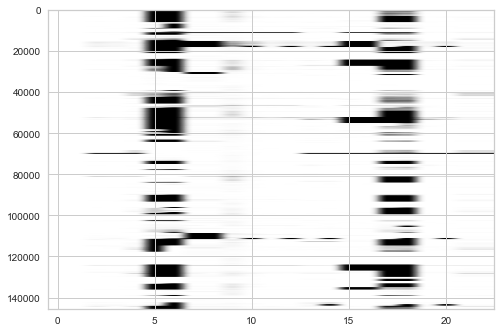

In [10]:
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='red')
plt.imshow(dataset.isna(),aspect = 'auto')
# aquestes dues columnes mb tant de nans es poden eliminar pq no ens produeixen informació, segurament, 
# les seves mesures estan preses per una estació meteorologica està espatllada

In [11]:
#S'eliminen les files amb més nans
idx = dataset.index[dataset.isnull().sum(axis=1)>8].tolist()
dataset.drop(idx,axis=0)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [12]:
#Fem una copia del dataset
dataset_cp = dataset.copy()
#Eliminem les files que ocntinguin NaNs a la variable resposta
dataset_cp = dataset_cp[dataset_cp['RainTomorrow'].notna()]
# Mirem el percentatge de NanNs de cada variable
print((dataset_cp.isnull().sum()/len(dataset_cp))*100)
#eliminem les columnes amb percentatges alts de NaNs
dataset_cp = dataset_cp.drop(['Evaporation'], axis=1)
dataset_cp = dataset_cp.drop(['Sunshine'], axis=1)
dataset_cp = dataset_cp.drop(['Cloud9am'], axis=1)
dataset_cp = dataset_cp.drop(['Cloud3pm'], axis=1)
#omplim les columnes amb un percentatge mes baix amb la moda dels valors nulls de la columna
dataset_cp['MinTemp'].fillna(dataset_cp['MinTemp'].mode()[0], inplace=True)
dataset_cp['MaxTemp'].fillna(dataset_cp['MaxTemp'].mode()[0], inplace=True)
dataset_cp['Rainfall'].fillna(dataset_cp['Rainfall'].mode()[0], inplace=True)
dataset_cp['WindGustDir'].fillna(dataset_cp['WindGustDir'].mode()[0], inplace=True)
dataset_cp['WindGustSpeed'].fillna(dataset_cp['WindGustSpeed'].mode()[0], inplace=True)
dataset_cp['WindDir9am'].fillna(dataset_cp['WindDir9am'].mode()[0], inplace=True)
dataset_cp['WindDir3pm'].fillna(dataset_cp['WindDir3pm'].mode()[0], inplace=True)
dataset_cp['WindSpeed9am'].fillna(dataset_cp['WindSpeed9am'].mode()[0], inplace=True)
dataset_cp['WindSpeed3pm'].fillna(dataset_cp['WindSpeed3pm'].mode()[0], inplace=True)
dataset_cp['Humidity9am'].fillna(dataset_cp['Humidity9am'].mode()[0], inplace=True)
dataset_cp['Humidity3pm'].fillna(dataset_cp['Humidity3pm'].mode()[0], inplace=True) 
dataset_cp['Pressure9am'].fillna(dataset_cp['Pressure9am'].mode()[0], inplace=True)
dataset_cp['Pressure3pm'].fillna(dataset_cp['Pressure3pm'].mode()[0], inplace=True)
dataset_cp['Temp9am'].fillna(dataset_cp['Temp9am'].mode()[0], inplace=True)
dataset_cp['Temp3pm'].fillna(dataset_cp['Temp3pm'].mode()[0], inplace=True)
dataset_cp['RainToday'].fillna(dataset_cp['RainToday'].mode()[0], inplace=True)
# Es transformes totes les dades a numeriques
dataset_cp['Year'] = dataset_cp['Date'].str.split("-", n=1).str[0].astype("int")
dataset_cp['Month'] = dataset_cp['Date'].str.split("-", n=2).str[1].astype("int")
dataset_cp['Day'] = dataset_cp['Date'].str.split("-", n=3).str[2].astype("int")
dataset_cp = dataset_cp.drop(['Date'], axis=1)
dataset_cp = pd.concat([dataset_cp, pd.get_dummies(dataset_cp.RainToday, drop_first=True, prefix='RainToday')], axis=1)
dataset_cp = dataset_cp.drop(['RainToday'], axis=1)
dataset_cp = pd.concat([dataset_cp, pd.get_dummies(dataset_cp.RainTomorrow, drop_first=True, prefix='RainTomorrow')], axis=1)
dataset_cp = dataset_cp.drop(['RainTomorrow'], axis=1)
le = LabelEncoder()
dataset_cp['Location'] = le.fit_transform(dataset_cp['Location'])
dataset_cp['WindGustDir'] = le.fit_transform(dataset_cp['WindGustDir'])
dataset_cp['WindDir9am'] = le.fit_transform(dataset_cp['WindDir9am'])
dataset_cp['WindDir3pm'] = le.fit_transform(dataset_cp['WindDir3pm'])

dataset_cp.info()

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          142193 non-null  int32  
 1   MinTemp           142193 non-null  float64
 2   MaxTemp           142193 non-null  float64
 3   Rainfall

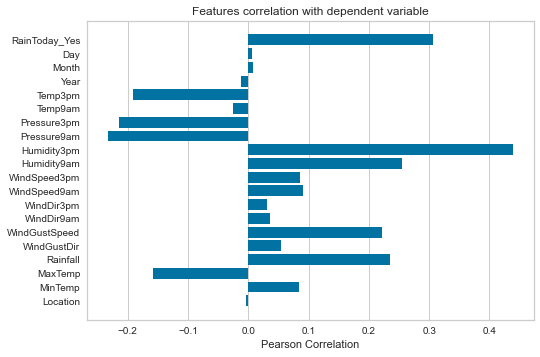

In [13]:
# Correlacio dels atributs amb la variable objectiu
X = dataset_cp.drop(['RainTomorrow_Yes'], axis=1)
Y = dataset_cp['RainTomorrow_Yes']
feature_names = list(X.columns)
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, Y)
visualizer.poof()

In [14]:
# Agafem la intersecció entre el dataset_cp i el dataset sense atributs objecte per tractar els outliers posteriorment
intersect = list(set(dataset_cp.columns).intersection(list(NoObj_data.columns)))
NoObj_data = dataset_cp[intersect]
#li treiem tb la columna Rainfall
NoObj_data = NoObj_data.drop(['Rainfall'], axis = 1)
NoObj_data

,Pressure9am,WindGustSpeed,Temp3pm,MinTemp,MaxTemp,Humidity3pm,Pressure3pm,Temp9am,Humidity9am,WindSpeed3pm,WindSpeed9am
0,1007.7,44.0,21.8,13.4,22.9,22.0,1007.1,16.9,71.0,24.0,20.0
1,1010.6,44.0,24.3,7.4,25.1,25.0,1007.8,17.2,44.0,22.0,4.0
2,1007.6,46.0,23.2,12.9,25.7,30.0,1008.7,21.0,38.0,26.0,19.0
3,1017.6,24.0,26.5,9.2,28.0,16.0,1012.8,18.1,45.0,9.0,11.0
4,1010.8,41.0,29.7,17.5,32.3,33.0,1006.0,17.8,82.0,20.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
145454,1024.7,31.0,20.9,3.5,21.8,27.0,1021.2,9.4,59.0,13.0,15.0
145455,1024.6,31.0,22.4,2.8,23.4,24.0,1020.3,10.1,51.0,11.0,13.0
145456,1023.5,22.0,24.5,3.6,25.3,21.0,1019.1,10.9,56.0,9.0,13.0
145457,1021.0,37.0,26.1,5.4,26.9,24.0,1016.8,12.5,53.0,9.0,9.0


In [15]:
NoObj_data.describe()

,Pressure9am,WindGustSpeed,Temp3pm,MinTemp,MaxTemp,Humidity3pm,Pressure3pm,Temp9am,Humidity9am,WindSpeed3pm,WindSpeed9am
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,1017.530193,39.659350,21.654889,12.174813,23.219477,51.495742,1015.281978,16.987588,69.220039,18.533303,13.954569
std,6.756591,13.195878,6.874665,6.391258,7.111209,20.532227,6.682175,6.472166,19.225704,8.754566,8.864344
min,980.500000,6.000000,-5.400000,-8.500000,-4.800000,0.000000,977.100000,-7.200000,0.000000,0.000000,0.000000
25%,1013.500000,31.000000,16.700000,7.600000,17.900000,37.000000,1011.000000,12.300000,57.000000,13.000000,7.000000
50%,1016.700000,37.000000,20.900000,12.000000,22.600000,52.000000,1015.500000,16.800000,70.000000,17.000000,13.000000
75%,1021.800000,46.000000,26.300000,16.800000,28.200000,65.000000,1019.400000,21.500000,84.000000,24.000000,19.000000
max,1041.000000,135.000000,46.700000,33.900000,48.100000,100.000000,1039.600000,40.200000,100.000000,87.000000,130.000000


In [16]:
MiceImputed = NoObj_data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(NoObj_data)

# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.05)
Q3 = MiceImputed.quantile(0.95)
IQR = Q3 - Q1
total_outlier_num = ((NoObj_data < (Q1 - 1.5 * IQR)) | (NoObj_data > (Q3 + 1.5 * IQR))).sum()
print(total_outlier_num)

# Removing outliers from the dataset
dataset_cp = dataset_cp[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_cp.info()

Pressure9am      0
WindGustSpeed    3
Temp3pm          0
MinTemp          0
MaxTemp          0
Humidity3pm      0
Pressure3pm      0
Temp9am          0
Humidity9am      0
WindSpeed3pm     7
WindSpeed9am     4
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 142182 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          142182 non-null  int32  
 1   MinTemp           142182 non-null  float64
 2   MaxTemp           142182 non-null  float64
 3   Rainfall          142182 non-null  float64
 4   WindGustDir       142182 non-null  int32  
 5   WindGustSpeed     142182 non-null  float64
 6   WindDir9am        142182 non-null  int32  
 7   WindDir3pm        142182 non-null  int32  
 8   WindSpeed9am      142182 non-null  float64
 9   WindSpeed3pm      142182 non-null  float64
 10  Humidity9am       142182 non-null  float64
 11  Humidity3pm       142182 non-null  flo

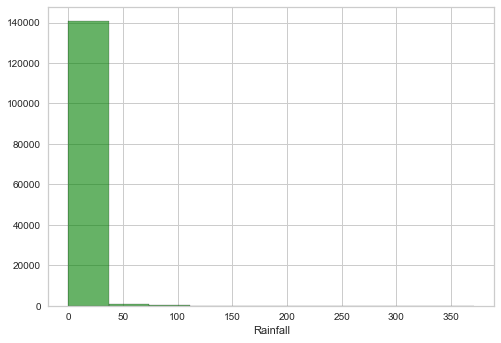

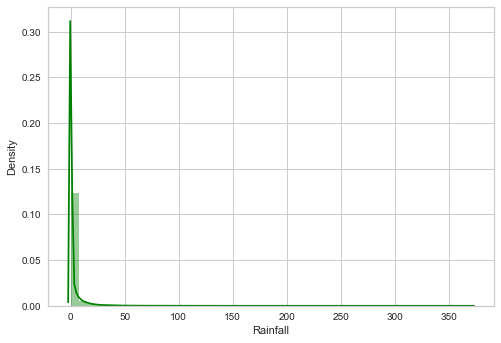

In [17]:
plt.hist(dataset_cp['Rainfall'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('Rainfall')
plt.show()

sns.distplot(dataset_cp['Rainfall'], color= 'green')

In [18]:
X = dataset_cp.drop(['RainTomorrow_Yes'], axis=1)
Y = dataset_cp['RainTomorrow_Yes']

In [19]:
#Normalitzem les dades
scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_cols = X.columns
X_scale.columns = X_cols

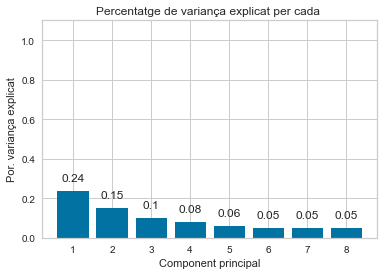

In [20]:
#es fa un pca per visualitzar els outliers
model = PCA(n_components=8)
model.fit(X_scale)
data_pca = pd.DataFrame(
    data = model.components_,
    columns = X.columns,
    index = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
X_pca = model.transform(X_scale)

# Percentatge de variança de cada component
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(model.n_components_) + 1,
    height = model.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data_pca.columns)) + 1, model.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentatge de variança explicat per cada ')
ax.set_xlabel('Component principal')
ax.set_ylabel('Por. variança explicat');

#Conclusió: com les variances són molt baixes, no val la pens afer un PCA.

#### Model Selection

In [21]:
#Separem en train i test
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y,test_size=0.3, random_state = 0)

In [22]:
#Fem feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

def BWSelection_VIF(Xtrain):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = Xtrain.columns
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(Xtrain.values, i)
                              for i in range(len(Xtrain.columns))]

    #si el valor de VIF és molt alt, hi ha molta correlacio entre variables
    if max(vif_data["VIF"]) > 5:
        X_new = Xtrain.drop(vif_data['feature'][np.argmax(vif_data["VIF"])],axis=1)
        BWSelection_VIF(X_new)
    else:
        llista.append([col for col in Xtrain])

In [23]:
llista =[]
BWSelection_VIF(X_scale)
llista = llista[0]

In [24]:
from sklearn.metrics import accuracy_score
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from joblib import Parallel, delayed
#Treballem en paral·lel per fer un model simple per a cada atribut considerat important en el VIF_Selection
#A partir d'aquí decidirem amb quins models treballar
def MultipleDT(atribut):
    
    clf_dt = DecisionTreeClassifier(random_state=0)
    clf_dt.fit(x_train[[atribut]],y_train)
    y_pred1 = clf_dt.predict(x_test[[atribut]])
    score1 = accuracy_score(y_test,y_pred1)
    y_pred2 = clf_dt.predict(x_train[[atribut]])
    score2 = accuracy_score(y_train,y_pred2)
    return [score1,score2]
t0=time.time() 
result = Parallel(n_jobs = 16)(delayed(MultipleDT)(atribut) for atribut in llista)

for atribut,r in zip(llista,result):
        print('Accuracy',atribut,':',r)
print('Time taken :' , time.time()-t0)

print("Null accuracy: ",y_test.value_counts()[0]/sum(y_test.value_counts()))


Accuracy Location : [0.7758996600632986, 0.7757995317853447]
Accuracy MinTemp : [0.77585277224241, 0.7758397218845138]
Accuracy Rainfall : [0.7852303364201149, 0.7903985853085093]
Accuracy WindGustDir : [0.7758996600632986, 0.7757995317853447]
Accuracy WindGustSpeed : [0.778079943734615, 0.7777688466446291]
Accuracy WindDir9am : [0.7758996600632986, 0.7757995317853447]
Accuracy WindDir3pm : [0.7758996600632986, 0.7757995317853447]
Accuracy WindSpeed9am : [0.775758996600633, 0.7759401971324364]
Accuracy WindSpeed3pm : [0.775946547884187, 0.7760205773307746]
Accuracy Humidity9am : [0.775758996600633, 0.7758899595084751]
Accuracy Humidity3pm : [0.8235611299964835, 0.8236357973213299]
Accuracy Pressure3pm : [0.7796741296448247, 0.7805017733881259]
Accuracy Year : [0.7758996600632986, 0.7757995317853447]
Accuracy Month : [0.7758996600632986, 0.7757995317853447]
Accuracy Day : [0.7758996600632986, 0.7757995317853447]
Accuracy RainToday_Yes : [0.7758996600632986, 0.7757995317853447]
Time take

In [25]:
#Fer Logistic Regression, KNN i SVM (aquests dos tarden molt en temps)

In [26]:
"""
#SVM (Support Vector Machine) amb diferents kernels
#Fem simple perquè la complexitat del SVC és O(n^3), i per tant amb moltes dades serà molt lent.
#SVM no es un bon model per un dataset tant gran, però fem un exemple.
#Fem servir Humidity3pm ja que hem vist que era el millor model (es l'atribut que té un accuracy major).
from sklearn import svm
t0=time.time() 

def MultipleSVC(k):
    
    model = svm.SVC(kernel = k) #classificació
    model.fit(x_train[['Humidity3pm']], y_train)
    y_pred = model.predict(x_test[['Humidity3pm']])
    score = accuracy_score(y_test,y_pred)

    return score
           
kernels = ["sigmoid", "rbf"]
result = Parallel(n_jobs = 2)(delayed(MultipleSVC)(kernel) for kernel in kernels)

for kernel,r in zip(kernels,result):
        print('Accuracy',kernel,':',r)
print('Time taken :' , time.time()-t0)
"""

'\n#SVM (Support Vector Machine) amb diferents kernels\n#Fem simple perquè la complexitat del SVC és O(n^3), i per tant amb moltes dades serà molt lent.\n#SVM no es un bon model per un dataset tant gran, però fem un exemple.\n#Fem servir Humidity3pm ja que hem vist que era el millor model (es l\'atribut que té un accuracy major).\nfrom sklearn import svm\nt0=time.time() \n\ndef MultipleSVC(k):\n    \n    model = svm.SVC(kernel = k) #classificació\n    model.fit(x_train[[\'Humidity3pm\']], y_train)\n    y_pred = model.predict(x_test[[\'Humidity3pm\']])\n    score = accuracy_score(y_test,y_pred)\n\n    return score\n           \nkernels = ["sigmoid", "rbf"]\nresult = Parallel(n_jobs = 2)(delayed(MultipleSVC)(kernel) for kernel in kernels)\n\nfor kernel,r in zip(kernels,result):\n        print(\'Accuracy\',kernel,\':\',r)\nprint(\'Time taken :\' , time.time()-t0)\n'

In [27]:
#Logistic Regression
#Model complet amb totes les variables seleccionades anteriorment
from sklearn.linear_model import LogisticRegression
t0=time.time() 

logreg = LogisticRegression(solver='saga', random_state=0)
logreg.fit(x_train[llista], y_train)


y_logr_pred_test = logreg.predict(x_test[llista])
y_pred_train = logreg.predict(x_train[llista])

print("Accuracy test:",accuracy_score(y_test, y_logr_pred_test))
print("Accuracy train:",accuracy_score(y_train, y_pred_train))
print('Time taken :' , time.time()-t0)


Accuracy test: 0.8389872230688079
Accuracy train: 0.8391391280757985
Time taken : 1.0391457080841064


In [28]:
#https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial

In [29]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #n = 5
t0=time.time() 

knn.fit(x_train[llista],y_train)
pred_test = knn.predict(x_test[llista])
pred_train = knn.predict(x_train[llista])
print("Accuracy test:",accuracy_score(y_test, pred_test))
print("Accuracy train:",accuracy_score(y_train, pred_train))
print('Time taken :' , time.time()-t0)


Accuracy test: 0.8308287422342047
Accuracy train: 0.8771489143649462
Time taken : 662.2799429893494


In [30]:
#Preceptron model
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
t0=time.time() 

clf.fit(x_train, y_train)
score_test = clf.score(x_test,y_test)
score_train = clf.score(x_train,y_train)

print("Accuracy test:",score_test)
print("Accuracy train:",score_train)
print('Time taken :' , time.time()-t0)


Accuracy test: 0.7956863204782558
Accuracy train: 0.7964672902830388
Time taken : 0.30389904975891113


In [31]:
from sklearn.ensemble import RandomForestClassifier
#Gradient Descent (ensemble method)
modelrfcla = RandomForestClassifier(n_estimators=50,random_state=9,n_jobs=-1).fit(x_train[llista],y_train)

pred = modelrfcla.predict(x_test[llista])

print(accuracy_score(pred,y_test))

print(modelrfcla.score(x_test[llista], y_test))
print(modelrfcla.score(x_train[llista], y_train))



0.850545070917829
0.850545070917829
0.999698574256232


#### Cross Validation

In [32]:
#ens qdem amb el logistic regression i amb el KNN q son els millors models
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, Y)
StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
i = 1
for train_index, test_index in skf.split(X_scale, Y):
   # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_scale.iloc[train_index], X_scale.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    #Logistic Regression
    logreg.fit(X_train[llista], Y_train)
    y_pred = logreg.predict(X_test[llista])
    score = accuracy_score(Y_test, y_pred)
    print("Accuracy Logistic Model: ",score,"fold: ", i)
    #KNN
    knn.fit(X_train[llista], Y_train)
    pred_test = knn.predict(X_test[llista])
    score = accuracy_score(Y_test, pred_test)
    print("Accuracy KNN Model: ",score,"fold: ", i)
    #RandomForest
    modelrfcla.fit(X_train[llista], Y_train)
    pred_test = modelrfcla.predict(X_test[llista])
    score = accuracy_score(Y_test, pred_test)
    print("Accuracy RandomForest Model: ",score,"fold: ", i)
    i = i+1

    
#Com es pot observar, el Logistic Regression dona millors accuracys
#No  seria convenient aplicar LeaveOneOut, ja que en aquest dataset hi ha  moltes files i trigariem molt


Accuracy Logistic Model:  0.8348630305587791 fold:  1
Accuracy KNN Model:  0.8150648802616309 fold:  1
Accuracy RandomForest Model:  0.8392938776945529 fold:  1
Accuracy Logistic Model:  0.8165066638534304 fold:  2
Accuracy KNN Model:  0.8025108133769385 fold:  2
Accuracy RandomForest Model:  0.8243837254281394 fold:  2
Accuracy Logistic Model:  0.8433323955549303 fold:  3
Accuracy KNN Model:  0.8093965395976931 fold:  3
Accuracy RandomForest Model:  0.8385497256998171 fold:  3
Accuracy Logistic Model:  0.8444577296384864 fold:  4
Accuracy KNN Model:  0.8199817133211422 fold:  4
Accuracy RandomForest Model:  0.840167393444929 fold:  4
Accuracy Logistic Model:  0.8462160641440427 fold:  5
Accuracy KNN Model:  0.8240610493740329 fold:  5
Accuracy RandomForest Model:  0.8447038964692644 fold:  5


### Metric analysis

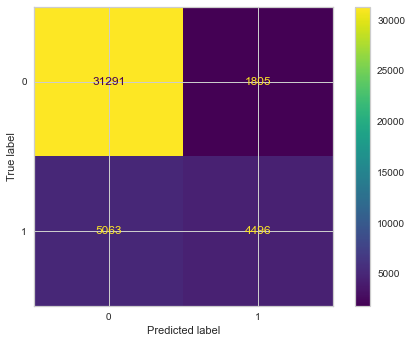

F1 score:  0.5669609079445145
Average precision score:  0.37792299039778976


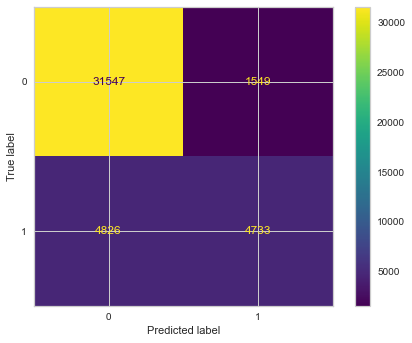

F1 score:  0.5975632851461397
Average precision score:  0.40936081282725084


In [33]:
#Fem la  matriu de confusió del Logistic Regression
from sklearn.metrics import plot_confusion_matrix, f1_score, average_precision_score
#Logistic Regression
logreg.fit(x_train[llista],y_train)
plot_confusion_matrix(logreg, x_test[llista], y_test)
plt.show()


#F1 score
print("F1 score: ",f1_score(y_logr_pred_test, y_test, average='binary'))
#Average precision accuracy,
print("Average precision score: ",average_precision_score(y_logr_pred_test, y_test))

#RandomForest
modelrfcla.fit(x_train[llista],y_train)
plot_confusion_matrix(modelrfcla, x_test[llista], y_test)
plt.show()

pred = modelrfcla.predict(x_test[llista])

#F1 score
print("F1 score: ",f1_score(pred, y_test, average='binary'))
#Average precision accuracy,
print("Average precision score: ",average_precision_score(pred, y_test))

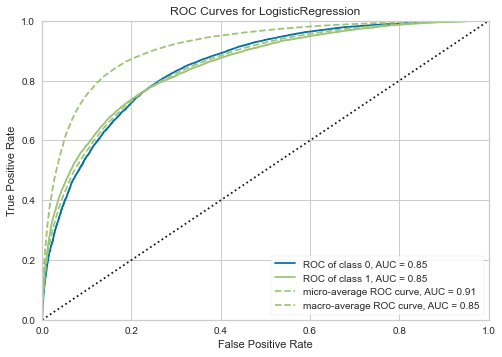

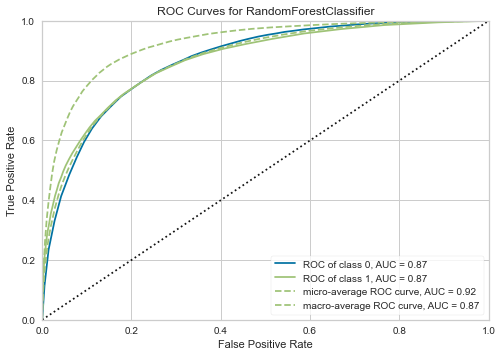

In [34]:
#ROC Curve
from yellowbrick.classifier import ROCAUC

#Logistic Regression
visualizer = ROCAUC(logreg)

visualizer.fit(x_train[llista], y_train)        # Fit the training data to the visualizer
visualizer.score(x_test[llista], y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


#RandomForest
visualizer = ROCAUC(modelrfcla)

visualizer.fit(x_train[llista], y_train)        # Fit the training data to the visualizer
visualizer.score(x_test[llista], y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


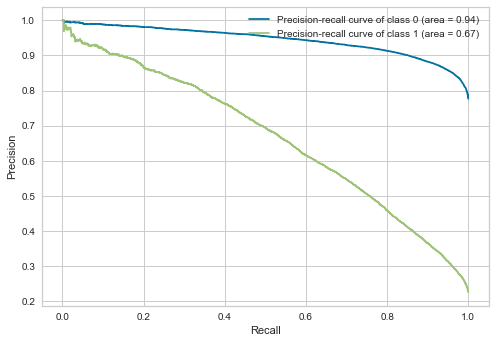

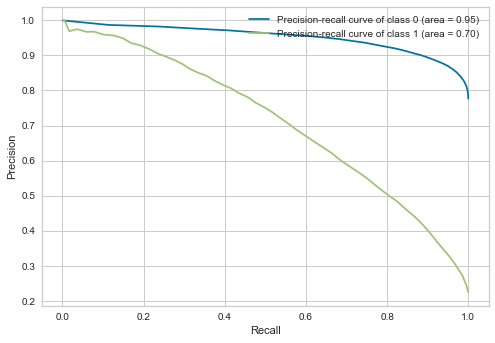

In [35]:
from sklearn.metrics import precision_recall_curve, auc
# Compute Precision-Recall and plot curve LogisticRegression
precision = {}
recall = {}
average_precision = {}
plt.figure()
probs = logreg.predict_proba(x_test[llista])

for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])
    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")
    
    
# Compute Precision-Recall and plot curve RandomForest
precision = {}
recall = {}
average_precision = {}
plt.figure()
probs = modelrfcla.predict_proba(x_test[llista])

for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])
    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

In [36]:
from sklearn.metrics import classification_report
#Logistic Regression
print(classification_report(y_test, y_logr_pred_test))
#Random Forest
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33096
           1       0.71      0.47      0.57      9559

    accuracy                           0.84     42655
   macro avg       0.79      0.71      0.73     42655
weighted avg       0.83      0.84      0.83     42655

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33096
           1       0.75      0.50      0.60      9559

    accuracy                           0.85     42655
   macro avg       0.81      0.72      0.75     42655
weighted avg       0.84      0.85      0.84     42655



### Hyperparameter Search

In [37]:
#Provem amb la Logistic Regression i amb el RandomForest

In [67]:
#Logistic Regression

# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import GridSearchCV
# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle = True)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_scale[llista],Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.839016 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.839016 (0.002612) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839016 (0.002612) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.839016 (0.002612) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.839016 (0.002612) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.839009 (0.002605) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839016 (0.002612) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.839009 (0.002605) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.839016 (0.002612) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.839009 (0.002605) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839009 (0.002605) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.839016 (0.002600) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.839009 (0.002605) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.838988 (0.002589) with: {'C': 0.1

In [ ]:
n_estimators = [10,50,100,150,200]
max_features = ['sqrt', 'log2']
#min_samples_split = [200,100,50,25,15,10,5,2,1]
#max_depth= [5,10,15,20,25,None] 
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)#min_samples_split=min_samples_split, max_depth = max_depth)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
grid_search = GridSearchCV(estimator=modelrfcla, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_scale, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))